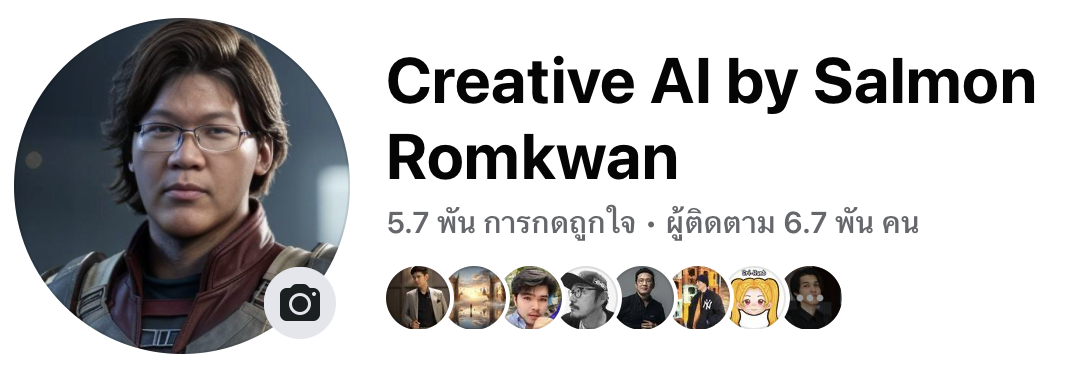

# สำหรับผู้ที่สนใจ เรียนรู้การทำภาพ Ai Image
** คอมไม่แรง เรามี Cloud ให้บริการ สำหรับ Workshop เรียนรู้และลงมือทำ บนเครื่องมือ
- Stable Diffusion WebUI A1111 : พื้นฐานการใช้งาน Stable diffusion และส่วนเสริมมากมาย
- Drawthing : แอฟที่ใช้งาน stable diffusion  บนแมคโดยเฉพาะ
- ComfyUI : แอฟที่รองรับเทคโนโลยีใหม่ สามารถทำงานซับซ้อนได้ ส่วนเสริมมีมากมาย
-  Krita Ai Drawing : แอฟตกแต่งภาพ แก้ไขภาพ ที่มี  comfyui ช่วยในการทำงานของเอไอ สามารถทำ live drawing เปลี่ยนภาพที่วาดให้เป็นเอไอแบบเรียลไทม์
- sd-forge : แอฟที่พัฒนาต่อยอดมาจาก  sd-webui สามารถใข้งานโมเดล flux ที่สามารถสร้างภาพคุณภาพสูง และกำลังนิยมมากในปัจจุบัน

** พิเศษ คลาส การ สร้างโมเดลเอไอ Lora ด้วย คาแรคเตอร์ หรือ สินค้าของคุณเอง **

รายละเอียด Inbox  มาได้ที่
https://www.facebook.com/prompt.mhai/

<a href="https://colab.research.google.com/github/SalmonRK/SalmonRK-Colab/blob/main/FLUX1/SalmonRK_SD_forge_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **** Google Colab สำหรับ Flux.1 Dev on Stable Diffusion Forge ****
***SalmonRK Stable Diffusion Fore Google Colab Version 1.3***
* Update 3-09-2024
* สามารใช้งาน Flux model  เพื่อทำภาพคุณภาพสูงได้
* อย่าลืม เลือก Runtime type เป็น
* T4 + High RAM หรือ L4 ด้วยนะ

เพิ่ม Extension
- 12 Extensions ที่น่าใช้งาน
- เรียกใช้งาน Lora , Controlnet บน Google Drive เมื่อตรวจเจอว่ามี
(ไม่สามารถติดตั้ง Flux model บน google drive ได้ เพราะจะมีปัญหาในการใช้งาน)

***วิธีการใช้งาน***
- รันข้อ 1 เพื่อ ติดตั้งโปรแกรม (เลือกได้ว่าจจะใช้บน Google Drive  หรือ Runtime)
- รันข้อ 2 รอจนได้ ลิ้ง .gradio.live กดเพื่อเข้าใช้งาน


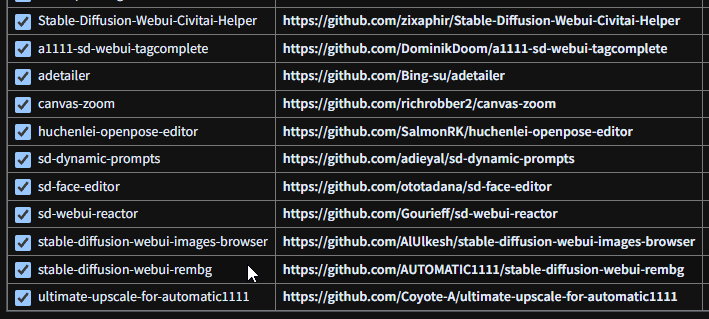

# 1. ติดตั้งโปรแกม Stable Diffusion Forge และ โมเดล Flux

In [ ]:
import os
import sys
import shutil
from google.colab import drive

##@markdown ติ๊กเลือก เพื่อติดตั้งโปรแกรมและโมเดลบน Google Drive
#USE_GOOGLE_DRIVE = False  #@param {type:"boolean"}
USE_GOOGLE_DRIVE = False
#@markdown ติ๊กเลือก เพื่ออัพเดคโปรแกรมล่าสุด
UPDATE_FORGE = False  #@param {type:"boolean"}
#INSTALL_DEPS = True #@param {type:"boolean"}
#ALLOW_EXTENSION_INSTALLATION = True #@param {type:"boolean"}
#@markdown <<<<< กด Play เพื่อติดตั้งโปรแกรม

WORKSPACE = '/content/SD-forge'

if USE_GOOGLE_DRIVE:
  print("📂 Connecting to Google Drive...")
  drive.mount('/content/drive')
  WORKSPACE = "/content/drive/MyDrive/SD-forge"
  %cd /content/drive/MyDrive

if not os.path.exists(f"/content/venv"):
    !apt install python3.10-venv &> /dev/null
    !python -m venv /content/venv

![ ! -d WORKSPACE ] && echo -= Initial setup SDForge =- && git clone --config core.filemode=false https://github.com/lllyasviel/stable-diffusion-webui-forge.git SD-forge &> /dev/null
%cd $WORKSPACE

#if not USE_GOOGLE_DRIVE:
if os.listdir(WORKSPACE):
    savedir = '''
    {
        "outdir_txt2img_samples": "/content/drive/MyDrive/outputs/txt2img-images",
        "outdir_img2img_samples": "/content/drive/MyDrive/outputs/img2img-images",
        "outdir_extras_samples": "/content/drive/MyDrive/outputs/extras-images",
        "outdir_grids": "",
        "outdir_txt2img_grids": "/content/drive/MyDrive/outputs/txt2img-grids",
        "outdir_img2img_grids": "/content/drive/MyDrive/outputs/img2img-grids",
        "outdir_save": "/content/drive/MyDrive/outputs/log/images",
        "outdir_init_images": "/content/drive/MyDrive/outputs/init-images"
    }
    '''
    with open(f"{WORKSPACE}/config.json","w") as fp:
        fp.write(savedir)

extra_args = []

if UPDATE_FORGE:
  !echo -= Updating SDForge =-
  %cd $WORKSPACE
  !git reset --hard
  !git pull

#Extension Installation
repos = [
    ("https://github.com/DominikDoom/a1111-sd-webui-tagcomplete","a1111-sd-webui-tagcomplete"),
    ("https://github.com/ototadana/sd-face-editor","sd-face-editor"),
    ("https://github.com/zixaphir/Stable-Diffusion-Webui-Civitai-Helper","Stable-Diffusion-Webui-Civitai-Helper"),
    ("https://github.com/AUTOMATIC1111/stable-diffusion-webui-rembg", "stable-diffusion-webui-rembg"),
    ("https://github.com/richrobber2/canvas-zoom", "canvas-zoom"),
    ("https://github.com/adieyal/sd-dynamic-prompts", "sd-dynamic-prompts"),
    ("https://github.com/mattjaybe/sd-wildcards", "sd-dynamic-prompts/sd-wildcards"),
    ("https://github.com/SalmonRK/huchenlei-openpose-editor", "huchenlei-openpose-editor"),
    ("https://github.com/Coyote-A/ultimate-upscale-for-automatic1111", "ultimate-upscale-for-automatic1111"),
    ("https://github.com/Bing-su/adetailer", "adetailer"),
    ("https://github.com/AlUlkesh/stable-diffusion-webui-images-browser", "stable-diffusion-webui-images-browser"),
    ("https://github.com/Gourieff/sd-webui-reactor", "sd-webui-reactor")
]
base_path = os.path.join(WORKSPACE, 'extensions')
for repo_url, target_dir in repos:
  target_path = os.path.join(base_path, target_dir)
  if not os.path.exists(target_path):
    !git clone {repo_url} {target_path}
  else:
    print(f"File {target_dir} already exists, skipping download.")
!cp -R {base_path}/sd-dynamic-prompts/sd-wildcards/wildcards {base_path}/sd-dynamic-prompts

# Model(s) setup
!apt-get -y install -qq aria2
drive.mount('/content/drive')

if not USE_GOOGLE_DRIVE:
    SD15 = '/content/SD-forge/models/Stable-diffusion'
else:
    SD15 = '/content/drive/MyDrive/Model_SD15/Model'

os.makedirs(SD15, exist_ok=True)

model_urls = [
    # ("https://civitai.com/api/download/models/123908", "model1.safetensors"),
    # ("https://civitai.com/api/download/models/220771", "model2.safetensors"),
    ("https://huggingface.co/Comfy-Org/flux1-dev/resolve/main/flux1-dev-fp8.safetensors", "flux1-dev-fp8.safetensors")
]

def download_models(urls, destination):
    for url, name in urls:
        file_path = os.path.join(destination, name)
        if not os.path.exists(file_path):
            !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M {url} -d {destination} -o {name}
            print(f"Downloaded {name}")
        else:
            print(f"{name} already exists, skipping download.")
download_models(model_urls, SD15)

# ControlNet
if not os.path.exists('/content/drive'):
  drive.mount('/content/drive') # Mount only if not already mounted
models = [
    #("https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11e_sd15_ip2p.pth", "control_v11e_sd15_ip2p.pth"),
    #("https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11e_sd15_shuffle.pth", "control_v11e_sd15_shuffle.pth"),
    ("https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11f1e_sd15_tile.pth", "control_v11f1e_sd15_tile.pth"),
    #("https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11f1p_sd15_depth.pth", "control_v11f1p_sd15_depth.pth"),
    #("https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11p_sd15_canny.pth", "control_v11p_sd15_canny.pth"),
    #("https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11p_sd15_inpaint.pth", "control_v11p_sd15_inpaint.pth"),
    ("https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11p_sd15_lineart.pth", "control_v11p_sd15_lineart.pth"),
    #("https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11p_sd15_normalbae.pth", "control_v11p_sd15_normalbae.pth"),
    #("https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11p_sd15_scribble.pth", "control_v11p_sd15_scribble.pth"),
    #("https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11p_sd15_seg.pth", "control_v11p_sd15_seg.pth"),
    #("https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11p_sd15_softedge.pth", "control_v11p_sd15_softedge.pth"),
    #("https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11p_sd15s2_lineart_anime.pth", "control_v11p_sd15s2_lineart_anime.pth"),
    #("https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11p_sd15_mlsd.pth", "control_v11p_sd15_mlsd.pth"),
    #("https://civitai.com/api/download/models/20330", "controlnetT2IAdapter_t2iAdapterColor.safetensors"),
    #("https://civitai.com/api/download/models/20330?type=Config", "controlnetT2IAdapter_t2iAdapterColor.yaml"),
    #("https://civitai.com/api/download/models/20331", "controlnetT2IAdapter_t2iAdapterStyle.safetensors"),
    #("https://civitai.com/api/download/models/20331?type=Config", "controlnetT2IAdapter_t2iAdapterStyle.yaml"),
    #("https://huggingface.co/monster-labs/control_v1p_sd15_qrcode_monster/resolve/main/control_v1p_sd15_qrcode_monster.safetensors", "control_v1p_sd15_qrcode_monster.safetensors"),
    #("https://huggingface.co/monster-labs/control_v1p_sd15_qrcode_monster/resolve/main/control_v1p_sd15_qrcode_monster.yaml", "control_v1p_sd15_qrcode_monster.yaml"),
    #("https://huggingface.co/lllyasviel/sd_control_collection/resolve/main/ip-adapter_sd15.pth", "ip-adapter_sd15.pth"),
    #("https://huggingface.co/lllyasviel/sd_control_collection/resolve/main/ip-adapter_sd15_plus.pth", "ip-adapter_sd15_plus.pth"),
    #("https://huggingface.co/h94/IP-Adapter/resolve/main/models/ip-adapter-plus-face_sd15.bin", "ip-adapter-plus-face_sd15.pth"),
    #("https://huggingface.co/TheMistoAI/MistoLine/resolve/main/mistoLine_fp16.safetensors", "mistoLine_fp16.safetensors")
    ("https://huggingface.co/xinsir/controlnet-union-sdxl-1.0/resolve/main/diffusion_pytorch_model_promax.safetensors", "xinsir-controlnet-union-sdxl-promax-1.safetensors"),
    ("https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11p_sd15_openpose.pth", "control_v11p_sd15_openpose.pth")
]
base_path = "/content/drive/MyDrive/Model_SD15/CTN/model"
os.makedirs(base_path, exist_ok=True)
for url, filename in models:
    target_path = os.path.join(base_path, filename)
    if not os.path.exists(target_path):
        !curl -Lo {target_path} {url} --ssl-no-revoke
    else:
        print(f"File {filename} already exists, skipping download.")

#Text Encoder Download
te_urls = [
    # ("https://civitai.com/api/download/models/123908", "model1.safetensors"),
    # ("https://civitai.com/api/download/models/220771", "model2.safetensors"),
    ("https://huggingface.co/comfyanonymous/flux_text_encoders/resolve/main/clip_l.safetensors", "clip_l.safetensors"),
    ("https://huggingface.co/comfyanonymous/flux_text_encoders/resolve/main/t5xxl_fp8_e4m3fn.safetensors", "t5xxl_fp8_e4m3fn.safetensors")
]
TE_PATH = os.path.join(WORKSPACE, 'models/text_encoder')

def download_models(te_urls, destination):
    for url, name in te_urls:
        file_path = os.path.join(destination, name)
        if not os.path.exists(file_path):
            !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M {url} -d {destination} -o {name}
            print(f"Downloaded {name}")
        else:
            print(f"{name} already exists, skipping download.")

if not os.path.exists(TE_PATH):
    os.makedirs(TE_PATH)

download_models(te_urls, TE_PATH)
#VAE Download
VAE_PATH = os.path.join(WORKSPACE, 'models/VAE')
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M 'https://huggingface.co/black-forest-labs/FLUX.1-schnell/resolve/main/ae.safetensors' -d {VAE_PATH} -o 'ae.safetensors'

#if ALLOW_EXTENSION_INSTALLATION:
#  extra_args.append("--enable-insecure-extension-access")

#if USE_GOOGLE_DRIVE:
#  extra_args.append("--ckpt-dir '/content/drive/MyDrive/Model_SD15/Model/'")

#extra_args.append("--api --share --enable-insecure-extension-access")
#extra_args_concat = " ".join(extra_args)
#with open(f"{WORKSPACE}/webui-user.sh", "w") as fp:
#    fp.write(f'export COMMANDLINE_ARGS="{extra_args_concat}"\n')



%cd /content
!source ./venv/bin/activate
!/content/venv/bin/pip install ipykernel
#!python -m ipykernel install --user
!/content/venv/bin/pip install insightface
    #!webui.sh

#!python launch.py {extra_args_concat}

# 2. Launch the web ui

In [ ]:
# Connect Google Drive
#@markdown  <<<<< กด Play เมื่อต้องการ เปิด โปรแกรม SD-forge
#@markdown - กดซ้ำ อีกครั้ง จะเปิดการ ปิด โปรแกรม


import os
import sys
from google.colab import drive
# Check if already mounted
# Check if drive is already mounted by looking for the mount directory
if not os.path.exists('/content/drive'):
  drive.mount('/content/drive') # Mount only if not already mounted
extra_args = []
#drive.mount('/content/drive')
#WORKSPACE = "/content/drive/MyDrive/SD-forge"
WORKSPACE = '/content/SD-forge'
# Web UI tunnel
#if not os.path.exists(f"{WORKSPACE}"):
#  WORKSPACE = "/content/drive/MyDrive/SD-forge"
#  extra_args.append("--ckpt-dir '/content/drive/MyDrive/Model_SD15/Model/' --lora-dir '/content/drive/MyDrive/Model_SD15/Lora/' --controlnet-dir '/content/drive/MyDrive/Model_SD15/CTN/model' --controlnet-preprocessor-models-dir '/content/drive/MyDrive/Model_SD15/CTN/annotator'")

LORA_PATH = '/content/drive/MyDrive/Model_SD15/Lora'
if os.path.exists(f"{LORA_PATH}"):
  extra_args.append("--lora-dir '/content/drive/MyDrive/Model_SD15/Lora/'")

CTN_PATH = '/content/drive/MyDrive/Model_SD15/CTN'
if os.path.exists(f"{LORA_PATH}"):
  extra_args.append("--controlnet-dir '/content/drive/MyDrive/Model_SD15/CTN/model' --controlnet-preprocessor-models-dir '/content/drive/MyDrive/Model_SD15/CTN/annotator'")

extra_args_concat = " ".join(extra_args)
%cd /content
!source ./venv/bin/activate
%cd {WORKSPACE}
!/content/venv/bin/python launch.py --share --enable-insecure-extension-access {extra_args_concat}
#!bash webui.sh -f

# Option 1. Download new models ,Lora & LyCoris

After finished load new model, Restart SD webui in #2

In [ ]:
# Connect Google Drive
import os
from google.colab import drive
!apt-get -y install -qq aria2
Download_On_GOOGLE_DRIVE = False  #@param {type:"boolean"}


CKP_PATH = '/content/SD-forge/models/Stable-diffusion'

if Download_On_GOOGLE_DRIVE:
  print("📂 Connecting to Google Drive...")
  drive.mount('/content/drive')
  CKP_PATH = "/content/drive/MyDrive/Model_SD15/Model"
  drive.mount('/content/drive')

if not os.path.exists(CKP_PATH):
  os.makedirs(CKP_PATH)

Civitai_API_key = "" #@param {type:"string"}
Checkpoint_01 = "https://civitai.com/api/download/models/62528" #@param {type:"string"}
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M "{Checkpoint_01}?token={Civitai_API_key}" -d {CKP_PATH}
Checkpoint_02 = "https://civitai.com/api/download/models/706363" #@param {type:"string"}
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M "{Checkpoint_02}?token={Civitai_API_key}" -d {CKP_PATH}

In [ ]:
import os
from google.colab import drive
!apt-get -y install -qq aria2
Download_On_GOOGLE_DRIVE = False  #@param {type:"boolean"}


LORA_PATH = '/content/SD-forge/models/Lora'

if Download_On_GOOGLE_DRIVE:
  print("📂 Connecting to Google Drive...")
  drive.mount('/content/drive')
  LORA_PATH = "/content/drive/MyDrive/Model_SD15/Lora"
  drive.mount('/content/drive')

if not os.path.exists(LORA_PATH):
    os.makedirs(LORA_PATH)
Civitai_API_key = "" #@param {type:"string"}
LORA_01 = "https://civitai.com/api/download/models/783311" #@param {type:"string"}
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M "{LORA_01}?token={Civitai_API_key}" -d {LORA_PATH}
LORA_02 = "https://civitai.com/api/download/models/774102" #@param {type:"string"}
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M "{LORA_02}?token={Civitai_API_key}" -d {LORA_PATH}


# Customized By [SalmonRK] (https://www.facebook.com/salmonrkch)
# 📚 GitHub for more: [_@SalmonRK_](https://github.com/SalmonRK)
